In [1]:
import os
import h5py

import numpy as np
import pandas as pd
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tqdm import tqdm
import cv2
import matplotlib.pyplot as plt  

In [2]:
base_dir = r"C:\Users\karti\edi\Dataset2"  
train_csv_path = os.path.join(base_dir, "train_1.csv")
train_images_path = os.path.join(base_dir, "train_images")
val_csv_path = os.path.join(base_dir, "valid.csv")
val_images_path = os.path.join(base_dir, "val_images")

df_train = pd.read_csv(train_csv_path)
df_val = pd.read_csv(val_csv_path)

In [4]:
def preprocess_images(df, image_dir, img_size=(224, 224)):
    images = []
    labels = []

    for _, row in tqdm(df.iterrows(), total=len(df), desc="Processing images"):
        img_path = os.path.join(image_dir, row['id_code'] + ".png")
        if os.path.exists(img_path):
          
            img = cv2.imread(img_path)
            img = cv2.resize(img, img_size)  
            img = img / 255.0  

            images.append(img)
            labels.append(row['diagnosis'])
        else:
            print(f"Image not found: {img_path}")

    images = np.array(images)
    labels = np.array(labels)
    return images, labels


images_train, labels_train = preprocess_images(df_train, train_images_path)
images_val, labels_val = preprocess_images(df_val, val_images_path)

labels_train = to_categorical(labels_train, num_classes=5)
labels_val= to_categorical(labels_val, num_classes=5)

print(f"Training data shape: {df_train.shape}")

np.savez_compressed("processed_data.npz", 
                     images_train=images_train, labels_train=labels_train, 
                     images_val=images_val, labels_val=labels_val)
print("Preprocessed data saved!")


Processing images: 100%|██████████| 366/366 [00:19<00:00, 19.12it/s]


Training data shape: (2930, 2)
Preprocessed data saved!


In [1]:

import tensorflow as tf; 
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
data = np.load("Dataset2/processed_data.npz")
images_train = data["images_train"]
labels_train = data["labels_train"]
images_val = data["images_val"]
labels_val = data["labels_val"]
import tensorflow as tf

gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("GPU memory growth enabled")
    except RuntimeError as e:
        print(e)
    cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')  
])


cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


history = cnn_model.fit(images_train, labels_train, epochs=20, validation_data=(images_val, labels_val), batch_size=32)
import h5py
model_path = os.path.join(base_dir, "cnn_model.h5")
cnn_model.save(model_path)
print(f"Model saved to {model_path}")

GPU memory growth enabled
Epoch 1/20
92/92 [==============================] - 17s 72ms/step - loss: 1.2759 - accuracy: 0.6655 - val_loss: 0.7150 - val_accuracy: 0.7486
Epoch 2/20
92/92 [==============================] - 4s 48ms/step - loss: 0.7632 - accuracy: 0.7116 - val_loss: 0.7179 - val_accuracy: 0.7514
Epoch 3/20
92/92 [==============================] - 4s 47ms/step - loss: 0.7278 - accuracy: 0.7290 - val_loss: 0.7017 - val_accuracy: 0.7486
Epoch 4/20
92/92 [==============================] - 4s 47ms/step - loss: 0.7289 - accuracy: 0.7362 - val_loss: 0.7641 - val_accuracy: 0.7459
Epoch 5/20
92/92 [==============================] - 4s 47ms/step - loss: 0.7101 - accuracy: 0.7379 - val_loss: 0.7458 - val_accuracy: 0.7432
Epoch 6/20
92/92 [==============================] - 4s 47ms/step - loss: 0.7037 - accuracy: 0.7416 - val_loss: 0.7112 - val_accuracy: 0.7350
Epoch 7/20
92/92 [==============================] - 4s 48ms/step - loss: 0.6668 - accuracy: 0.7512 - val_loss: 0.7888 - val_acc

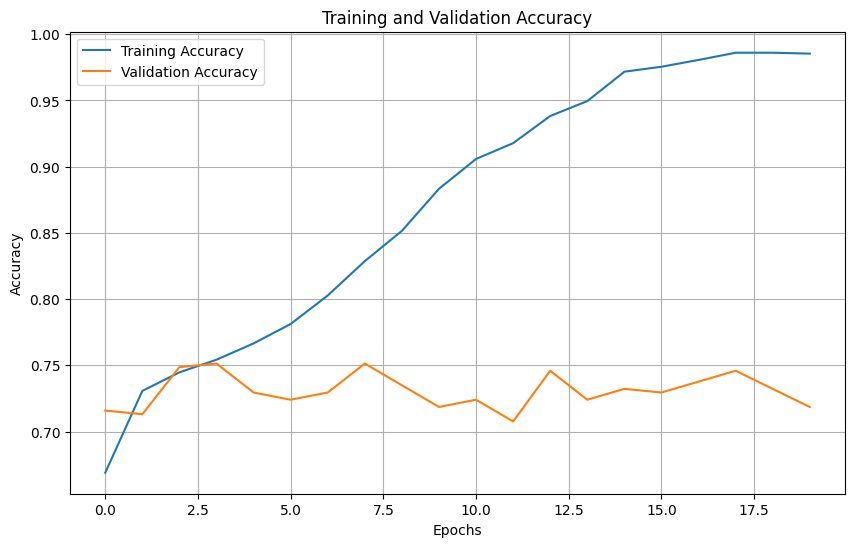

In [7]:
def plot_accuracy_graph(history):
    
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.grid(True)

   
    plt.show()


plot_accuracy_graph(history)

In [4]:
import cv2
import numpy as np
import tensorflow as tf


image_path = r'C:\Users\karti\edi\Dataset2\test_images\e4dcca36ceb4.png'  


img = cv2.imread(image_path)


if img is None:
    print("Error: Unable to load image. Please check the image path.")
else:
    print("Image loaded successfully!")

    img = cv2.resize(img, (224, 224))  
    img = img / 255.0  
    img = np.expand_dims(img, axis=0)  

    cnn_model = tf.keras.models.load_model(r'C:\Users\karti\edi\Dataset2\cnn_model.h5')

  
    prediction = cnn_model.predict(img)
    predicted_class = np.argmax(prediction)
    
    
    class_names = ['No_DR', 'Mild', 'Moderate', 'Severe', 'Proliferate_DR']
    print(f"Predicted Class: {class_names[predicted_class]}")


Image loaded successfully!


c:\Users\karti\edi\edi\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\karti\edi\edi\Lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
Predicted Class: No_DR


In [3]:
import tkinter as tk
from tkinter import filedialog, messagebox
from PIL import Image, ImageTk
import numpy as np
import cv2
import tensorflow as tf
import threading  


model_path = r'C:\Users\karti\edi\models\cnn_model.h5'  
cnn_model = tf.keras.models.load_model(model_path)


class_names = ['No_DR', 'Mild', 'Moderate', 'Severe', 'Proliferate_DR']

def preprocess_image(image_path):
   
    img = cv2.imread(image_path)
    if img is None:
        messagebox.showerror("Error", "Error loading image!")
        return None
    img = cv2.resize(img, (224, 224))  
    img = img / 255.0  
    img = np.expand_dims(img, axis=0)  
    return img

def predict_image():
    
    file_path = filedialog.askopenfilename(title="Select an Image", filetypes=[("Image files", "*.png;*.jpg;*.jpeg")])
    
    if file_path:
       
        threading.Thread(target=run_prediction, args=(file_path,)).start()

def run_prediction(image_path):
   
    img = preprocess_image(image_path)
    
    if img is not None:
       
        prediction = cnn_model.predict(img)
        predicted_class = class_names[np.argmax(prediction)]  
        predicted_label=tk.Label(window,text= "Predicted Class is "+ predicted_class)
        predicted_label.grid(row=2,column=3,padx=10,pady=10)
        
       
        #messagebox.showinfo("Prediction Result", f"The image is classified as: {predicted_class}")
        
    
        display_image(image_path)

def display_image(image_path):
    
    img = Image.open(image_path)
    img = img.resize((300, 300))  
    img = ImageTk.PhotoImage(img)
    
   
    panel = tk.Label(window, image=img)
    panel.image = img  
    panel.grid(row=1, column=3, columnspan=2)


window = tk.Tk()
window.geometry("400x640+0+0")
window.title("Diabetes Detection Using Machine Learning")

title_label=tk.Label(window,text="Diabetes Detection",font=("Algerian Regular",30,"bold"),border=12,relief=tk.RAISED,bg="red",foreground="white") 
title_label.grid(row=0,column=3,padx=10,pady=10)


predict_button = tk.Button(window, text="Load and Predict Image", command=predict_image)
predict_button.grid(row=3, column=3, padx=10, pady=10)


window.mainloop()


In [2]:
import numpy as np
import os
base_dir = r"C:\Users\karti\edi\Dataset2"  

# Load saved preprocessed data
data = np.load("Dataset2/processed_data.npz")
import tensorflow as tf

gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("GPU memory growth enabled")
    except RuntimeError as e:
        print(e)

images_train = data["images_train"]
labels_train = data["labels_train"]
images_val = data["images_val"]
labels_val = data["labels_val"]

print("Preprocessed data loaded successfully!")
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Load Pretrained ResNet101 Model
base_model = ResNet101(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Unfreeze Top Layers for Fine-Tuning
for layer in base_model.layers[-30:]:  # Unfreeze last 30 layers
    layer.trainable = True

# Add Custom Layers
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

output_layer = Dense(5, activation='softmax')(x)  # 5 Output Classes

# Create Model
resnet_model = Model(inputs=base_model.input, outputs=output_layer)

# Compile Model with Lower Learning Rate
resnet_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Data Augmentation
train_datagen = ImageDataGenerator(
    rotation_range=30,  
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

# Apply Augmentation
train_generator = train_datagen.flow(images_train, labels_train, batch_size=32)

# Callbacks for Better Training
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6, verbose=1)
#early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1)

# Train the Model
history = resnet_model.fit(
    train_generator,
    epochs=25,  
    validation_data=(images_val, labels_val),
    batch_size=32,
    callbacks=[lr_scheduler]
)

# Save Model
resnet_model.save(os.path.join(base_dir, "resnet_model_improved.h5"))
print("ResNet model saved successfully!")

GPU memory growth enabled
Preprocessed data loaded successfully!
Epoch 1/25
92/92 [==============================] - 64s 455ms/step - loss: 1.2580 - accuracy: 0.5758 - val_loss: 1.9510 - val_accuracy: 0.4699 - lr: 1.0000e-04
Epoch 2/25
92/92 [==============================] - 38s 414ms/step - loss: 0.8844 - accuracy: 0.7020 - val_loss: 2.2915 - val_accuracy: 0.4699 - lr: 1.0000e-04
Epoch 3/25
92/92 [==============================] - 38s 412ms/step - loss: 0.7839 - accuracy: 0.7253 - val_loss: 1.9448 - val_accuracy: 0.4699 - lr: 1.0000e-04
Epoch 4/25
92/92 [==============================] - 38s 413ms/step - loss: 0.6866 - accuracy: 0.7642 - val_loss: 2.0216 - val_accuracy: 0.0656 - lr: 1.0000e-04
Epoch 5/25
92/92 [==============================] - 38s 412ms/step - loss: 0.6337 - accuracy: 0.7812 - val_loss: 2.3944 - val_accuracy: 0.4699 - lr: 1.0000e-04
Epoch 6/25
92/92 [==============================] - ETA: 0s - loss: 0.5973 - accuracy: 0.7884
Epoch 6: ReduceLROnPlateau reducing learn

In [5]:
from tensorflow.keras.applications import MobileNetV2 as mobile_vit_v2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
data = np.load("processed_data.npz")
images_train = data["images_train"]
labels_train = data["labels_train"]
images_val = data["images_val"]
labels_val = data["labels_val"]
def build_mobilevit_model():
    base_model = mobile_vit_v2(input_shape=(224, 224, 3), include_top=False, weights="imagenet")
    
    # Freeze the base model
    base_model.trainable = False  

    # Add a custom classification head
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),  # Flatten feature maps
        Dense(128, activation='relu'),  # Fully connected layer
        Dense(5, activation='softmax')  # Output layer for 5 classes
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model
model_choice = "mobilevit"  # Change to 'resnet' or 'vit' if needed
if model_choice == "resnet":
    model = build_resnet_model()
elif model_choice == "vit":
    model = build_vit_model()
else:
    model = build_mobilevit_model()

# Train the model
history = model.fit(images_train, labels_train, epochs=20, validation_data=(images_val, labels_val), batch_size=16)

# Save the model
model.save(os.path.join(base_dir, "vit_model.h5"))
print("Model saved successfully!")


Epoch 1/20
184/184 [==============================] - 15s 39ms/step - loss: 0.7454 - accuracy: 0.7362 - val_loss: 0.6666 - val_accuracy: 0.7486
Epoch 2/20
184/184 [==============================] - 4s 21ms/step - loss: 0.5831 - accuracy: 0.7775 - val_loss: 0.6524 - val_accuracy: 0.7596
Epoch 3/20
184/184 [==============================] - 4s 21ms/step - loss: 0.5210 - accuracy: 0.8082 - val_loss: 0.6222 - val_accuracy: 0.7678
Epoch 4/20
184/184 [==============================] - 4s 21ms/step - loss: 0.4817 - accuracy: 0.8242 - val_loss: 0.5749 - val_accuracy: 0.7705
Epoch 5/20
184/184 [==============================] - 4s 22ms/step - loss: 0.4420 - accuracy: 0.8321 - val_loss: 0.6044 - val_accuracy: 0.7732
Epoch 6/20
184/184 [==============================] - 5s 26ms/step - loss: 0.3947 - accuracy: 0.8502 - val_loss: 0.6036 - val_accuracy: 0.7814
Epoch 7/20
184/184 [==============================] - 5s 26ms/step - loss: 0.3650 - accuracy: 0.8672 - val_loss: 0.5683 - val_accuracy: 0.776